# Implementación del algoritmo de Gradiente Descendente.

## Implementación:
Para implementar el algoritmo de Gradiente Descendente, se siguen los siguientes pasos:

### 1) Definir las funciones a minimizar:


en nuestro caso utilizaremos la función de rosenbrock (https://www.sfu.ca/~ssurjano/rosen.html), y la función "Six Hump Camel Back" (https://www.sfu.ca/~ssurjano/camel6.html).  
Para ambas funciones implementaremos el algoritmo de gradiente descendente en dos y tres dimensiones.  

#### Rosenbrock:

In [10]:
!pip install pillow ffmpeg
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from matplotlib import animation, rc
from IPython.display import HTML

def rosenbrock(X):
    result = 0
    for i in range(len(X)-1):
        result += 100*(X[i+1]-X[i]**2)**2+(X[i]-1)**2
    return result

def grad_rosenbrock(X):
    first = -400*X[0]*(X[1]-X[0]**2)+2*(X[0]-1)
    result = [first]
    last = 200*(X[-1]-X[-2]**2)
    for i in range(1, len(X)-1):
        calc = -400*X[i]*(X[i+1]-X[i]**2)+2*(X[i]-1)+200*(X[i]-X[i-1]**2)
        result.append(calc)
    result.append(last)
    return np.array(result)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Six Hump Camel:

In [11]:
def six_hump_camel(X):
    if len(X) == 3:
        x, y, z = X
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2+z**2
    else:
        x, y = X
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2
        

def grad_six_hump_camel(X):
    if len(X) == 3:
        x, y, z = X
        return np.array([
            2*x**5 - 8.4*x**3 + 8*x + y,
            x + 16*y**3 - 8*y,
            2*z
        ])
    else:
        x, y = X
        return np.array([
            2*x**5 - 8.4*x**3 + 8*x + y,
            x + 16*y**3 - 8*y
        ])

### 2) Implementar el algoritmo de Gradiente Descendiente.  

In [12]:
def gradient_descent(grad_f, x_init, learn_rate, max_iterations):
    x = x_init
    hist=[x_init]
    for i in range(max_iterations):
        gradient = grad_f(x)
        x = x - learn_rate * grad_f(x)
        hist.append(x)
        if np.linalg.norm(grad_f(x)) < 1e-2:
            return hist, x
        return hist, x

### 3) Minimizar las funciones en 3 y 4 dimensiones.

#### Rosenbrock en 3 dimensiones  
Primero que todo visualizemos la función en 3 dimensiones.

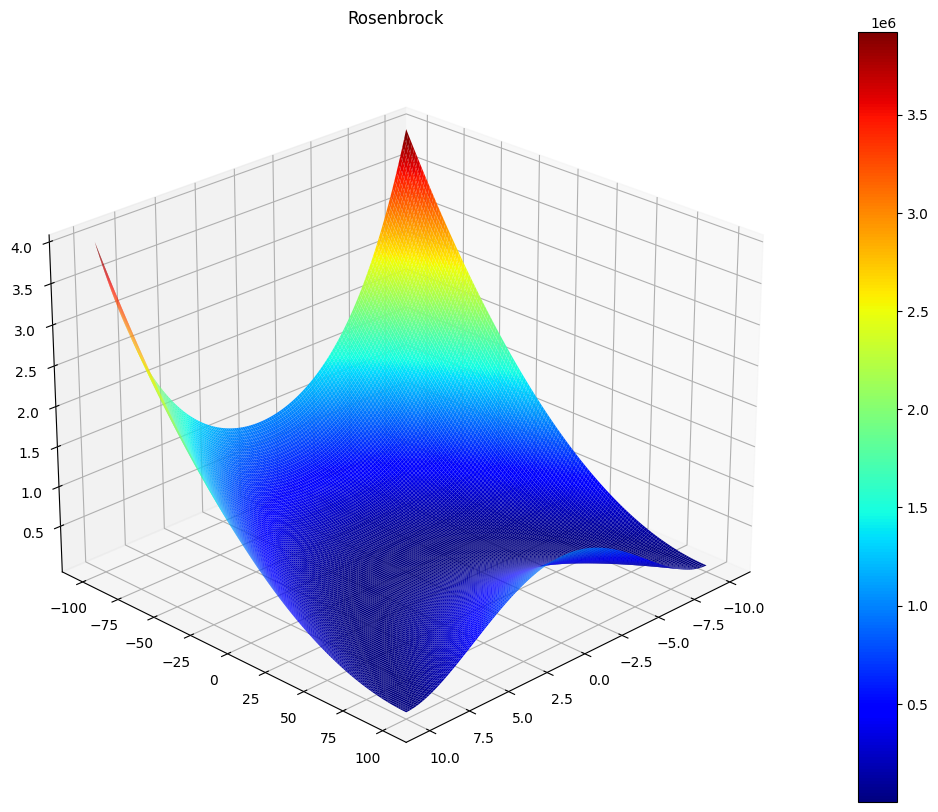

In [13]:
x = np.linspace(-10, 10, 150)
y = np.linspace(-100, 100, 150)
X, Y = np.meshgrid(x, y)
Z = rosenbrock((X, Y))
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.set_title('Rosenbrock')
ax.view_init(elev=25., azim=45.)
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(s)
plt.show()

Procedemos a minimizar la función:

In [14]:
x_init = np.array([
    round(random.random()*4, 2),
    round(random.random()*4, 2)
    ]) # Generamos un X inicial aleatorio.
hist3d_ros, x_min = gradient_descent(grad_rosenbrock, x_init, 0.0001, 100000) # Minimizamos la función
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_ros)-1)

X inicial: [0.41 3.66]
X óptimo: [0.46738516 3.590162  ]
iteraciónes:  1


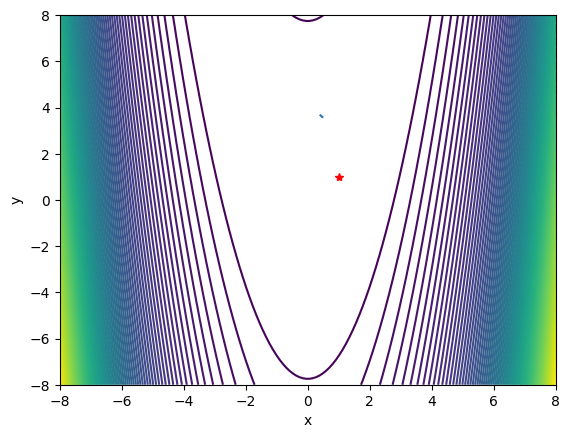

In [15]:
ncols = 150
nrows = 150
X = np.linspace(-8, 8, ncols)
Y = np.linspace(-8, 8, nrows)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock((X, Y))
Z = np.array(Z).reshape([nrows,ncols])
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels = 100)
ax.plot(1,1,"r*")
ax.plot([i[0] for i in hist3d_ros], [i[1] for i in hist3d_ros])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Podemos ver que se tomaron demasiadas iteraciónes para acercarce al minimo local, al estar minimizando una función concava, debemos escoger un alfa muy pequeño para movernos en pequeñas cantidades y evitar el riesgo de divergencia en la función.  
Para contrarrestar este efecto, construiremos una función helper, que nos calcula un alfa distinto en cada iteración, este alfa nos garantiza que en cada iteración no nos movamos más de 0.1 unidades, por lo tanto evitamos el riesgo de divergencia.  

In [16]:
def iterative_alpha(grad, x):
    alpha = 1
    res = alpha * grad(x)
    while np.linalg.norm(res>0.1):
        alpha /= 10
        res = alpha * grad(x)
    if alpha > 1e-3:
        return 0.001*grad(x)
    return alpha*grad(x)

def gradient_descent(grad_f, x_init, learn_rate, max_it):
    x = x_init
    hist=[x_init]
    for i in range(max_it):
        learn_rate = iterative_alpha(grad_f, x)
        x = x - learn_rate
        hist.append(x)
        if np.linalg.norm(grad_f(x)) < 1e-10:
            return hist, x
    return hist, x

Ahora sí podemos optimizar la función con un punto incial aleatorio en el hipercubo recomendado por la teoría: el hipercubo [-5, 10]. Para facilitarnos las cosas, utilizaremos el hipercubo [-5, 5].

In [17]:
x_init = np.array([
    round(random.random()*10-5, 2),
    round(random.random()*10-5, 2)
    ]) # Generamos un X inicial aleatorio.
x_init = np.array([6,6])
hist3d_ros, x_min = gradient_descent(grad_rosenbrock, x_init, 0.0001, 100000) # Minimizamos la función
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_ros)-1)

X inicial: [6 6]
X óptimo: [1. 1.]
iteraciónes:  64910


Podemos observar una mejor convergencia. Además de la clara ventaja de comenzar desde un intervalo más amplio.

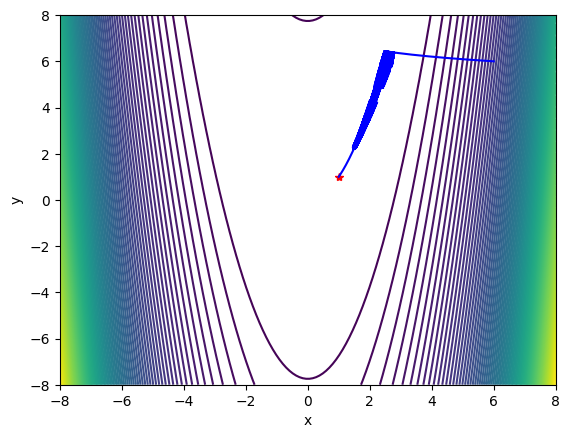

In [18]:
fig, ax = plt.subplots()

ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 100)
ax.plot(1,1, color="red", marker="*")
plot, = ax.plot([], [], color='blue')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist3d_ros][0:i**2]
    y_points = [i[1] for i in hist3d_ros][0:i**2]
    plot.set_data(x_points, y_points)
    return (plot,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=math.floor(math.sqrt(len(hist3d_ros))), interval=50, blit=True)

anim.save("GD_ros3d.gif", dpi=120, writer="pillow")

In [19]:
HTML(anim.to_html5_video())

#### Rosenbrock en 4 dimensiones:  
El proceso para optimizar funciones se puede generalizar para funciónes de n variables de entrada, el proceso matemático no cambia en lo absoluto:

In [20]:
x_init = np.array([
    round(random.random()+5, 2),
    round(random.random()+5, 2),
    round(random.random()+5, 2)
    ]) # Generamos un X inicial aleatorio con 3 variables.
x_init=np.array([5.5, 5.5, 5.5])
hist4d_ros, x_min = gradient_descent(grad_rosenbrock, x_init, 0.0000001, 50000) # Minimizamos la función
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist4d_ros)-1)

X inicial: [5.5 5.5 5.5]
X óptimo: [1. 1. 1.]
iteraciónes:  50000


No podemos graficar una función de 4 dimensiones, pero sí podemos graficar los valores que va tomando X mientras avanza el algoritmo de gradiente por descenso.

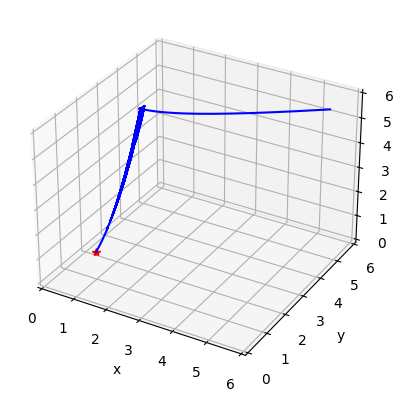

In [21]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((0, 6))
ax.set_ylim((0, 6))
ax.set_zlim((0, 6))
ax.plot(1,1,1, color='red', marker='*')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist4d_ros][0:i**2]
    y_points = [i[1] for i in hist4d_ros][0:i**2]
    z_points = [i[2] for i in hist4d_ros][0:i**2]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=math.floor(math.sqrt(len(hist4d_ros))), interval=50, blit=True)

anim.save("GD_ros4d.gif", dpi=120, writer="pillow")

In [22]:
HTML(anim.to_html5_video())

#### Three Hump Camel en 3 dimensiones

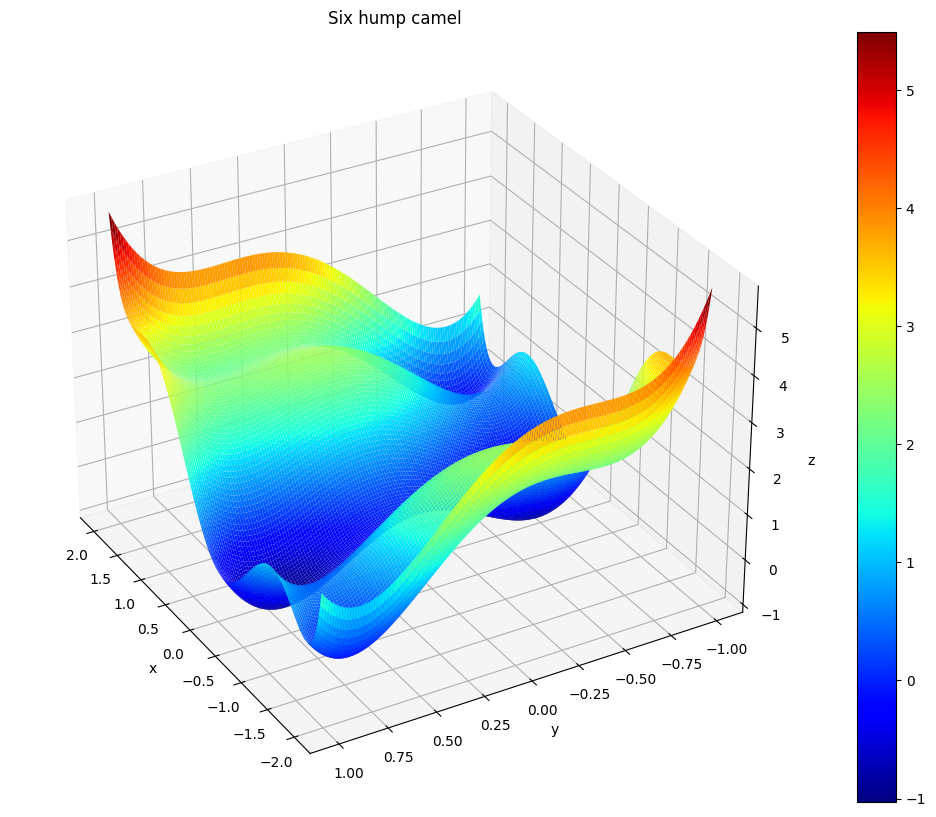

In [23]:
x = np.linspace(-2, 2, 150)
y = np.linspace(-1, 1, 150)
X, Y = np.meshgrid(x, y)
Z = six_hump_camel((X, Y))
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.set_title('Six hump camel')
ax.view_init(elev=30., azim=150.)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(s)
plt.show()

In [24]:
x_init = np.array([
    round(random.random()*6-3, 2),
    round(random.random()*4-2, 2)
    ])
x_init = np.array([0.5, 1.9])
hist3d_camel, x_min = gradient_descent(grad_six_hump_camel, x_init, 0.0001, 1000000)
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_camel)-1)

X inicial: [0.5 1.9]
X óptimo: [-0.08984201  0.7126564 ]
iteraciónes:  3171


Veamos el camino tomado por el algoritmo:

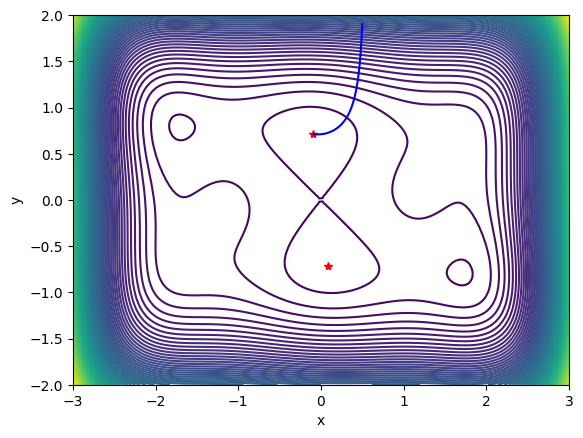

In [25]:
fig, ax = plt.subplots()
x = np.linspace(-3, 3, 150)
y = np.linspace(-2, 2, 150)
X, Y = np.meshgrid(x, y)
Z = six_hump_camel((X, Y))
ax.set_xlim((-3, 3))
ax.set_ylim((-2, 2))
ax.contour(X,Y,Z, levels = 100)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(0.0898,-0.7126, "r*")
ax.plot(-0.0898,0.7126, "r*")
plot, = ax.plot([], [], color='blue')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist3d_camel][0:i*100]
    y_points = [i[1] for i in hist3d_camel][0:i*100]
    plot.set_data(x_points, y_points)
    return (plot,)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(hist3d_camel)/100), interval=50, blit=True)

anim.save("GD_camel3d.gif", dpi=120, writer="pillow")

In [26]:
HTML(anim.to_html5_video())

#### Six hump camel en 4 dimensiones.

In [27]:
x_init = np.array([
    round(random.random()*6-3, 2),
    round(random.random()*4-2, 2),
    round(random.random()*4-2, 2)
    ])
x_init = np.array([-0.55, -1.32, -1.09])
hist4d_camel, x_min = gradient_descent(grad_six_hump_camel, x_init, 0.0001, 1000000)
print('X inicial:', x_init)
print('X óptimo:', x_min)
print('iteraciónes: ', len(hist3d_camel)-1)

X inicial: [-0.55 -1.32 -1.09]
X óptimo: [ 8.98420131e-02 -7.12656403e-01 -4.99681127e-11]
iteraciónes:  3171


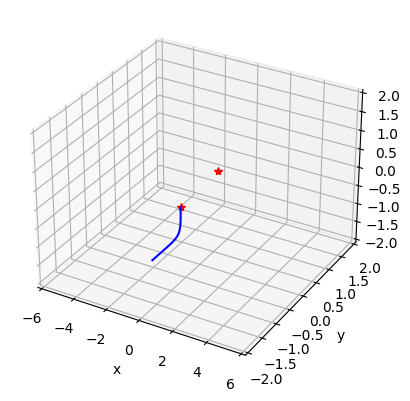

In [28]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))
ax.plot(0.0898,-0.7126, 0, marker='*', color='red')
ax.plot(-0.0898,0.7126, 0, marker='*', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = [i[0] for i in hist4d_camel][0:i*100]
    y_points = [i[1] for i in hist4d_camel][0:i*100]
    z_points = [i[2] for i in hist4d_camel][0:i*100]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(hist4d_camel)/100), interval=50, blit=True)

anim.save("GD_camel4d.gif", dpi=120, writer="pillow")

In [30]:
HTML(anim.to_html5_video())